In [127]:
# Importing NumPy and Pandas
import numpy as np
import pandas as pd

# Importing matplotlib.pyplot - the specific plotting API 
# https://matplotlib.org/api/pyplot_api.html
import matplotlib.pyplot as plt

# Import Seaborn
import seaborn as sns

# This magic line will allow you to generate plots
# within the Jupyter notebook.
%matplotlib inline

#this adds some extra styling to the graphs we will make
sns.set_style("whitegrid")

In [128]:
# Bring in act data.
act_2017 = pd.read_csv('data/act_2017.csv')
act_2018 = pd.read_csv('data/act_2018.csv')
act_2019 = pd.read_csv('data/act_2019.csv')
region_state = pd.read_csv('data/us_regions_divisions.csv')
#act_2019_ca = pd.read_csv('data/act_2019_ca.csv')
#sat_2017 = pd.read_csv('data/sat_2017.csv')
#sat_2018 = pd.read_csv('data/sat_2018.csv')
#sat_2019 = pd.read_csv('data/sat_2019.csv')
#sat_2019_major = pd.read_csv('data/sat_2019_by_intended_college_major.csv')
#sat_2019_ca = pd.read_csv('data/sat_2019_ca.csv')
#sat_act_by_college = pd.read_csv('data/sat_act_by_college.csv')

# Check out the first five rows of the stocks data.

In [129]:
act_2017.shape

(52, 7)

In [130]:
# Check out the first five rows of the act_2017 data.
act_2017.head()
act_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [131]:
act_2017_drop = act_2017.drop(columns=['English','Math', 'Reading', 'Science'])
act_2017_drop
#Drop the extra columns 

,State,Participation,Composite
0,National,60%,21.0
1,Alabama,100%,19.2
2,Alaska,65%,19.8
3,Arizona,62%,19.7
4,Arkansas,100%,19.4
5,California,31%,22.8
6,Colorado,100%,20.8
7,Connecticut,31%,25.2
8,Delaware,18%,24.1
9,District of Columbia,32%,24.2


In [132]:
act_2017_drop.dtypes

State            object
Participation    object
Composite        object
dtype: object

In [133]:
#Remove '%' sign from 'Participation'

act_2017_drop['Participation'] = act_2017_drop['Participation'].replace({'%': ''}, regex=True)

# Convert to numeric
act_2017_drop['Participation'] = pd.to_numeric(act_2017_drop['Participation'], errors='coerce')

In [134]:
act_2017_drop

,State,Participation,Composite
0,National,60,21.0
1,Alabama,100,19.2
2,Alaska,65,19.8
3,Arizona,62,19.7
4,Arkansas,100,19.4
5,California,31,22.8
6,Colorado,100,20.8
7,Connecticut,31,25.2
8,Delaware,18,24.1
9,District of Columbia,32,24.2


In [135]:
act_2017_drop.dtypes

State            object
Participation     int64
Composite        object
dtype: object

In [136]:
#cleaning the composite from object and change to numeric..., the record is index 51 as above 
#reasonable to convert to float using to numeric..with the function that find the error record isna() return boolean 
#that keep the non_numeric_values (filter out the values that convert to 'NAN'
#The Composite score, as reported by ACT, is the average of the four test scores earned during a single test administration, rounded to the nearest whole number.

numeric_values = pd.to_numeric(act_2017_drop['Composite'], errors='coerce')
non_numeric_values = act_2017_drop[numeric_values.isna()]
print(non_numeric_values)

      State  Participation Composite
51  Wyoming            100     20.2x


In [137]:
#replace the values from x to ''
act_2017_drop['Composite'] = act_2017_drop['Composite'].replace({'x': ''}, regex=True)

In [138]:
#convert again
act_2017_drop['Composite']=  pd.to_numeric(act_2017_drop['Composite'], errors='coerce')

In [139]:
act_2017_drop

,State,Participation,Composite
0,National,60,21.0
1,Alabama,100,19.2
2,Alaska,65,19.8
3,Arizona,62,19.7
4,Arkansas,100,19.4
5,California,31,22.8
6,Colorado,100,20.8
7,Connecticut,31,25.2
8,Delaware,18,24.1
9,District of Columbia,32,24.2


In [140]:
act_2017_drop.dtypes

State             object
Participation      int64
Composite        float64
dtype: object

In [141]:
act_2017_drop.insert(loc=3,column='Year',value ='2017')

In [142]:
act_2017_drop.dtypes

State             object
Participation      int64
Composite        float64
Year              object
dtype: object

In [143]:
print(act_2017_drop)

                   State  Participation  Composite  Year
0               National             60       21.0  2017
1                Alabama            100       19.2  2017
2                 Alaska             65       19.8  2017
3                Arizona             62       19.7  2017
4               Arkansas            100       19.4  2017
5             California             31       22.8  2017
6               Colorado            100       20.8  2017
7            Connecticut             31       25.2  2017
8               Delaware             18       24.1  2017
9   District of Columbia             32       24.2  2017
10               Florida             73       19.8  2017
11               Georgia             55       21.4  2017
12                Hawaii             90       19.0  2017
13                 Idaho             38       22.3  2017
14              Illinois             93       21.4  2017
15               Indiana             35       22.6  2017
16                  Iowa       

In [144]:
act_2017_drop['Participation'].mode()

0    100
Name: Participation, dtype: int64

In [145]:
act_2017_drop['Participation'].median()

68.0

In [146]:
act_2017_drop['Participation'].mean()

65.15384615384616

In [147]:
act_2017_drop.count()

State            52
Participation    52
Composite        52
Year             52
dtype: int64

In [148]:
act_2017_drop.duplicated('State')

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
dtype: bool

In [149]:
act_2017_drop.describe()

,Participation,Composite
count,52.000000,52.000000
mean,65.153846,21.509615
std,31.832518,2.002083
min,8.000000,17.800000
25%,31.000000,19.800000
50%,68.000000,21.400000
75%,100.000000,23.600000
max,100.000000,25.500000


In [150]:
act_2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [151]:
act_2018['Participation'] = act_2018['Participation'].replace({'%': ''}, regex=True)

# Convert the cleaned 'Participation_Per' column to numeric
act_2018['Participation'] = act_2018['Participation'].apply(pd.to_numeric, errors='coerce')

In [152]:
print(act_2018)

                   State  Participation  Composite
0                Alabama            100       19.1
1                 Alaska             33       20.8
2                Arizona             66       19.2
3               Arkansas            100       19.4
4             California             27       22.7
5               Colorado             30       23.9
6            Connecticut             26       25.6
7               Delaware             17       23.8
8   District of columbia             32       23.6
9                Florida             66       19.9
10               Georgia             53       21.4
11                Hawaii             89       18.9
12                 Idaho             36       22.3
13              Illinois             43       23.9
14               Indiana             32       22.5
15                  Iowa             68       21.8
16                Kansas             71       21.6
17              Kentucky            100       20.2
18             Louisiana       

In [153]:
act_2018.insert(loc=3,column='Year',value ='2018')

In [154]:
act_2018.duplicated()
#found duplicated in 2018 (impact the data is not unique however, state in U.S.
#delete duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20     True
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
dtype: bool

In [155]:
act_2018C=act_2018.drop_duplicates()
act_2018C.count()

State            51
Participation    51
Composite        51
Year             51
dtype: int64

In [156]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     int64  
 2   Composite      52 non-null     float64
 3   Year           52 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.8+ KB


In [157]:
act_2019.head()

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [158]:
act_2019.describe()

,Composite
count,52.000000
mean,21.450000
std,2.175487
min,17.900000
25%,19.800000
50%,20.950000
75%,23.650000
max,25.500000


In [159]:
act_2019.tail()

,State,Participation,Composite
47,Washington,24%,22.1
48,West Virginia,49%,20.8
49,Wisconsin,100%,20.3
50,Wyoming,100%,19.8
51,National,52%,20.7


In [160]:
act_2019['Participation'] = act_2019['Participation'].replace({'%': ''}, regex=True)

# Convert the cleaned 'Participation_Per' column to numeric
act_2019['Participation'] = act_2019['Participation'].apply(pd.to_numeric, errors='coerce')

In [161]:
print(act_2019)

                   State  Participation  Composite
0                Alabama            100       18.9
1                 Alaska             38       20.1
2                Arizona             73       19.0
3               Arkansas            100       19.3
4             California             23       22.6
5               Colorado             27       23.8
6            Connecticut             22       25.5
7               Delaware             13       24.1
8   District of Columbia             32       23.5
9                Florida             54       20.1
10               Georgia             49       21.4
11                Hawaii             80       19.0
12                 Idaho             31       22.5
13              Illinois             35       24.3
14               Indiana             29       22.5
15                  Iowa             66       21.6
16                Kansas             72       21.2
17              Kentucky            100       19.8
18             Louisiana       

In [162]:
act_2019.insert(loc=3,column='Year',value ='2019')

In [163]:
act_2019['Participation'].describe()

count     52.000000
mean      58.538462
std       34.188326
min        6.000000
25%       24.750000
50%       53.000000
75%      100.000000
max      100.000000
Name: Participation, dtype: float64

In [164]:
#found difference number of state 50 + District of Columbia values the data have National at tails (2019) at Head (2017) find the 
index_2019 = act_2019[act_2019['State'] == 'National'].index
index_2017= act_2017_drop[act_2017_drop['State'] == 'National'].index
#Drop national values because our data can represent the national as once.

In [165]:
act_2019=act_2019.drop(index = index_2019)
act_2019.count()

State            51
Participation    51
Composite        51
Year             51
dtype: int64

In [166]:
act_2017_drop=act_2017_drop.drop(index = index_2017)
act_2017_drop.count()

State            51
Participation    51
Composite        51
Year             51
dtype: int64

In [167]:
concatenated_act = pd.concat([act_2017_drop, act_2018C, act_2019], ignore_index=True)

In [168]:
concatenated_act.value_counts()

State           Participation  Composite  Year
Alabama         100            18.9       2019    1
Ohio            75             22.0       2017    1
New York        31             24.2       2017    1
North Carolina  100            19.0       2019    1
                               19.1       2017    1
                                                 ..
Kentucky        100            20.0       2017    1
                               20.2       2018    1
Louisiana       100            18.8       2019    1
                               19.2       2018    1
Wyoming         100            20.2       2017    1
Name: count, Length: 153, dtype: int64

In [169]:
concatenated_act.rename(columns={'State': 'state', 'Participation': 'participation', 'Composite': 'composite' , 'Year' :'year' }, inplace=True)

In [170]:
concatenated_act

,state,participation,composite,year
0,Alabama,100,19.2,2017
1,Alaska,65,19.8,2017
2,Arizona,62,19.7,2017
3,Arkansas,100,19.4,2017
4,California,31,22.8,2017
...,...,...,...,...
148,Virginia,21,24.0,2019
149,Washington,24,22.1,2019
150,West Virginia,49,20.8,2019
151,Wisconsin,100,20.3,2019


In [171]:
state_counts = concatenated_act['state'].unique()
state_counts

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'District of columbia'],
      dtype=object)

In [172]:
concatenated_act['state']=concatenated_act['state'].str.upper()

In [173]:
concatenated_act['state'].describe()

count         153
unique         51
top       ALABAMA
freq            3
Name: state, dtype: object

In [174]:
#(concatenated_df['year'])

In [175]:
concatenated_act['participation'] = pd.to_numeric(concatenated_act['participation'], errors='coerce')
concatenated_act['composite'] = pd.to_numeric(concatenated_act['composite'], errors='coerce')

In [176]:
concatenated_act.dtypes

state             object
participation      int64
composite        float64
year              object
dtype: object

In [177]:
concatenated_act.to_csv('concatenated_act.csv', index=False)

In [178]:
## Exploratory Data Analysis
concatenated_act.describe()

,participation,composite
count,153.000000,153.000000
mean,61.882353,21.493464
std,33.467766,2.096321
min,6.000000,17.700000
25%,29.000000,19.800000
50%,66.000000,21.300000
75%,100.000000,23.600000
max,100.000000,25.600000


In [179]:
concatenated_act['participation'].skew()

-0.0649620330203808

In [180]:
concatenated_act['composite'].skew()

0.29685728102681724

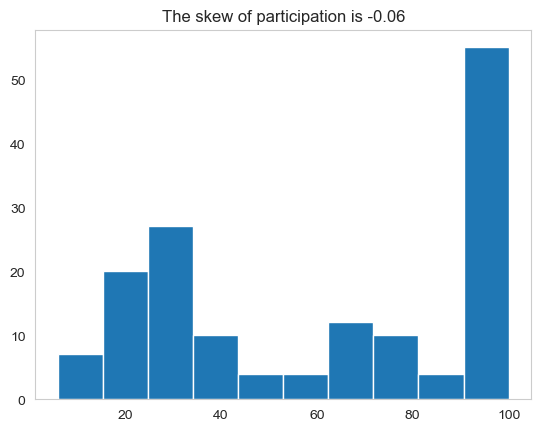

In [181]:
concatenated_act['participation'].hist(grid=False);
plt.title(f"The skew of participation is {concatenated_act['participation'].skew().round(2)}");

In [182]:
concatenated_act.groupby('year').describe().T

year                       2017        2018        2019
participation count   51.000000   51.000000   51.000000
              mean    65.254902   61.725490   58.666667
              std     32.140842   34.037085   34.515890
              min      8.000000    7.000000    6.000000
              25%     31.000000   28.500000   24.500000
              50%     69.000000   66.000000   54.000000
              75%    100.000000  100.000000  100.000000
              max    100.000000  100.000000  100.000000
composite     count   51.000000   51.000000   51.000000
              mean    21.519608   21.496078   21.464706
              std      2.020695    2.111583    2.194523
              min     17.800000   17.700000   17.900000
              25%     19.800000   19.950000   19.800000
              50%     21.400000   21.300000   21.100000
              75%     23.600000   23.650000   23.700000
              max     25.500000   25.600000   25.500000

In [183]:
concatenated_act.groupby(['year','composite'])['state'].describe()

count unique             top freq
year composite                                  
2017 17.8          1      1          NEVADA    1
     18.6          1      1     MISSISSIPPI    1
     18.7          1      1  SOUTH CAROLINA    1
     19.0          1      1          HAWAII    1
     19.1          1      1  NORTH CAROLINA    1
...              ...    ...             ...  ...
2019 24.4          1      1        MICHIGAN    1
     24.5          1      1        NEW YORK    1
     24.7          1      1    RHODE ISLAND    1
     25.0          1      1   NEW HAMPSHIRE    1
     25.5          2      2     CONNECTICUT    1

[110 rows x 4 columns]

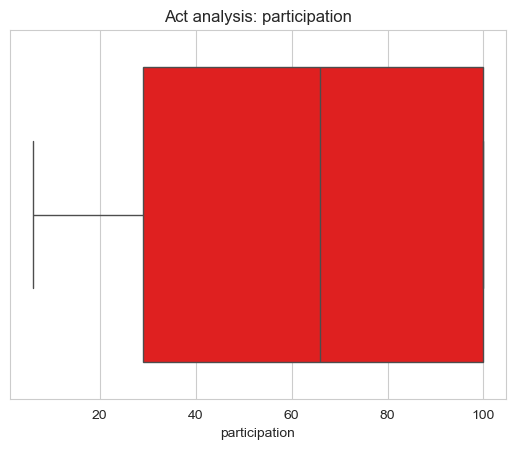

In [184]:
plt.title('Act analysis: participation')
sns.boxplot(x=concatenated_act['participation'],color ='r');

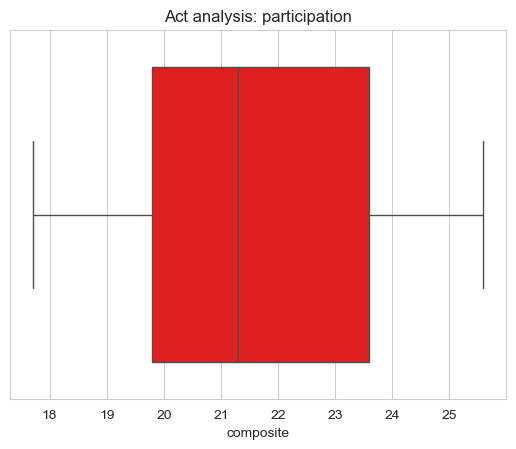

In [185]:
plt.title('Act analysis: participation')
sns.boxplot(x=concatenated_act['composite'],color ='r');

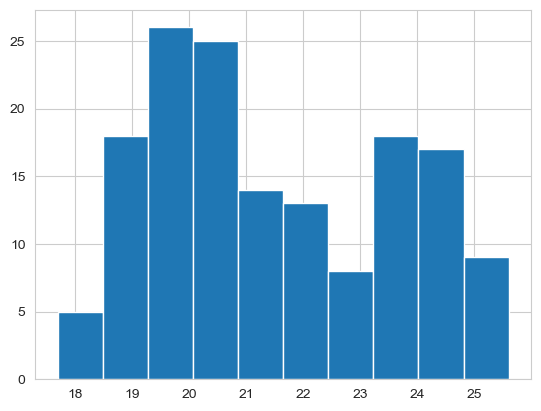

In [186]:
plt.hist(concatenated_act['composite']);

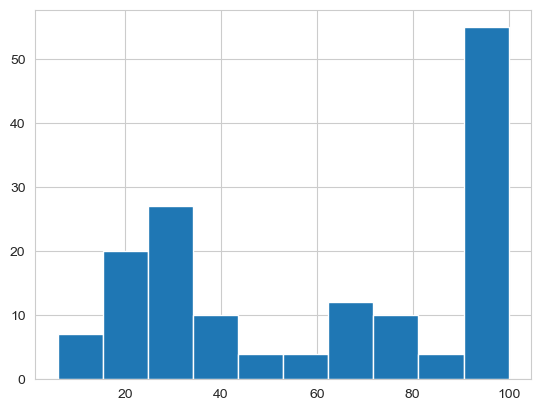

In [187]:
plt.hist(concatenated_act['participation']);

In [188]:
concatenated_act.corr(numeric_only=True)

,participation,composite
participation,1.000000,-0.859335
composite,-0.859335,1.000000


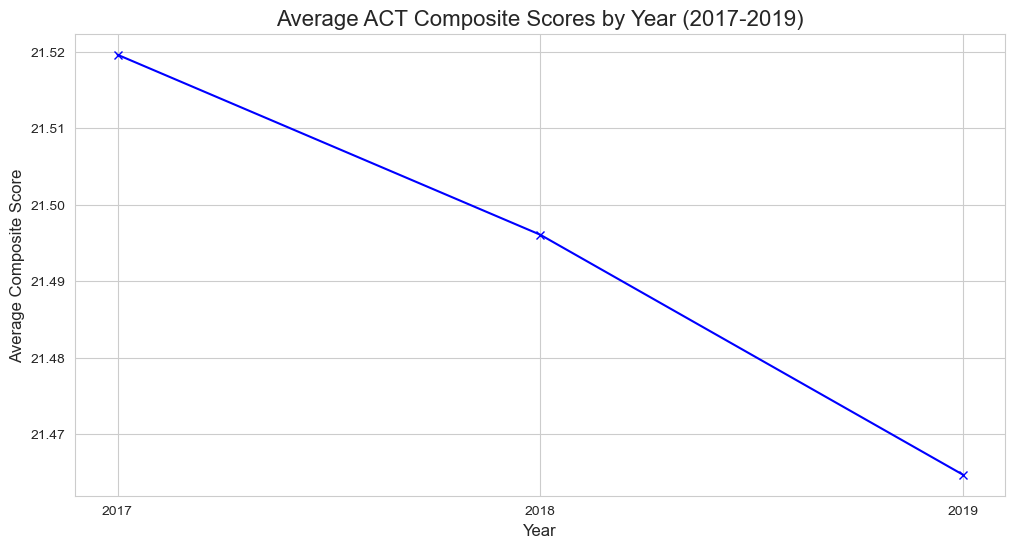

In [519]:
# Plot a line graph for composite scores over years
plt.figure(figsize=(12, 6))

# Group by year and calculate average composite score
avg_composite_by_year = concatenated_act.groupby('year')['composite'].mean()

# Plot
plt.plot(avg_composite_by_year.index, avg_composite_by_year.values, marker='x', linestyle='-', color='blue')
plt.title('Average ACT Composite Scores by Year (2017-2019)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Composite Score', fontsize=12)
plt.grid(True)
plt.savefig('Average_ACT_Composite.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

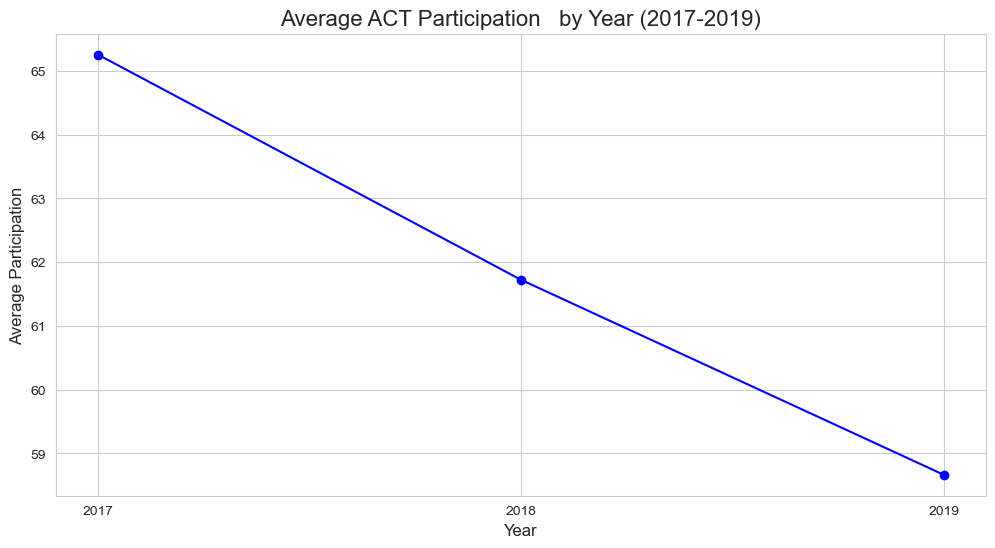

In [265]:
# Plot a line graph for composite scores over years
plt.figure(figsize=(12, 6))

# Group by year and calculate average composite score
avg_composite_by_year = concatenated_act.groupby('year')['participation'].mean()

# Plot
plt.plot(avg_composite_by_year.index, avg_composite_by_year.values, marker='x', linestyle='-', color='blue')
plt.title('Average ACT Participation   by Year (2017-2019)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Participation', fontsize=12)
plt.grid(True)
plt.savefig('Average_ACT_Participation.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

In [191]:
correlation = concatenated_act['participation'].corr(concatenated_act['composite'])

In [192]:
correlation

-0.8593350757798698

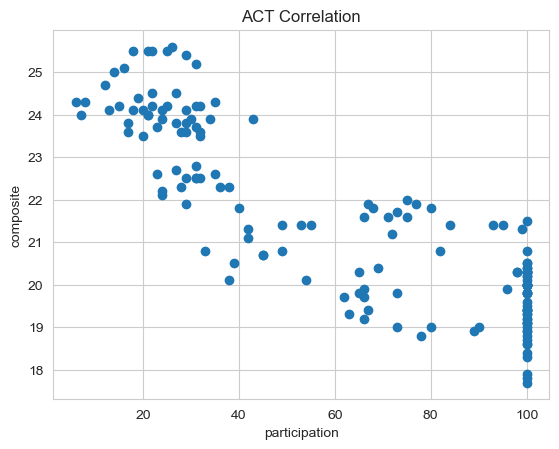

In [449]:
plt.scatter(concatenated_act['participation'],concatenated_act['composite'])

plt.title("ACT Correlation")
plt.ylabel("composite", fontsize = 10)
plt.xlabel("participation", fontsize = 10);
plt.savefig('scatter_p_c.png', dpi=300, bbox_inches='tight')

In [479]:
mean_participation = concatenated_act['participation'].mean()
states_below_average = concatenated_act[concatenated_act['participation'] < mean_participation]

unique_state=states_below_average['state'].unique().T
unique_state

array(['CALIFORNIA', 'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA',
       'GEORGIA', 'IDAHO', 'INDIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'NEW HAMPSHIRE', 'NEW JERSEY',
       'NEW YORK', 'OREGON', 'PENNSYLVANIA', 'RHODE ISLAND', 'TEXAS',
       'VERMONT', 'VIRGINIA', 'WASHINGTON', 'ALASKA', 'COLORADO',
       'ILLINOIS', 'FLORIDA', 'WEST VIRGINIA'], dtype=object)

In [515]:
trends_below_average = concatenated_act[concatenated_act['state'].isin(unique_state)]


,state,participation,composite,year
1,ALASKA,65,19.8,2017
4,CALIFORNIA,31,22.8,2017
5,COLORADO,100,20.8,2017
6,CONNECTICUT,31,25.2,2017
7,DELAWARE,18,24.1,2017


Text(0, 0.5, 'Participation Rate (%)')

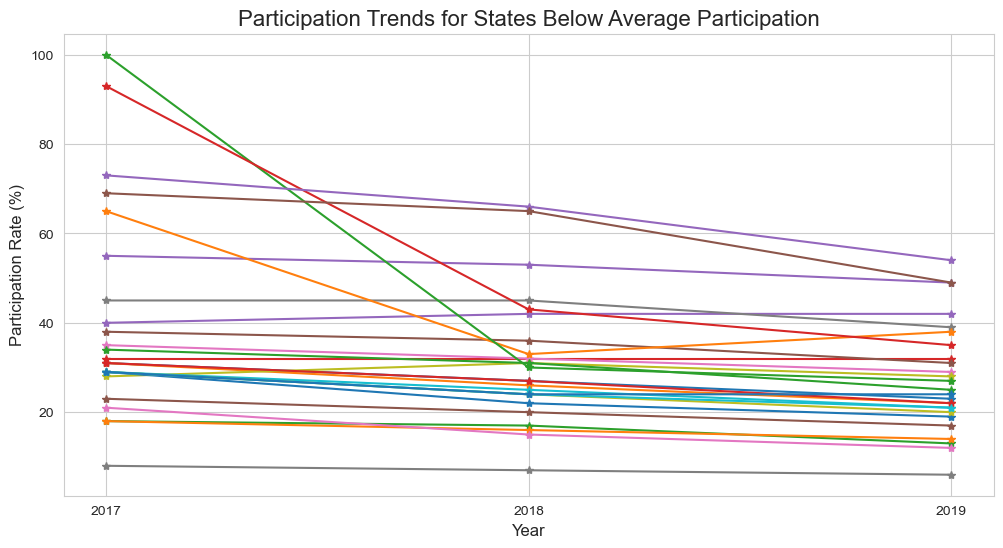

In [517]:
plt.figure(figsize=(12, 6))

# Loop through each unique state and plot its participation trend
for state in unique_state:
    state_data = trends_below_average[trends_below_average['state'] == state]
    plt.plot(state_data['year'], state_data['participation'], marker='*', label=state)

# Add labels and title
plt.title('Participation Trends for States Below Average Participation', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Participation Rate (%)', fontsize=12)

In [385]:
#find the min & max value of participation in each year..
#highest_participation = concatenated_act.groupby('year')['participation'].max()
#lowest_participation = concatenated_act.groupby('year')['participation'].min()
#how to get the state name from the highest_participation and lowest_participation
#move to idxmax and idxmin function , the result is index and use iloc to get into the data

id_highest_participation= concatenated_act.groupby('year')['participation'].idxmax()

id_lowest_participation= concatenated_act.groupby('year')['participation'].idxmin()

highest_participation =concatenated_act.iloc[id_highest_participation]
lowest_participation = concatenated_act.iloc[id_lowest_participation]


In [389]:
type(id_highest_participation)

pandas.core.series.Series

In [429]:
#how many state participate 100%

states_participation = concatenated_act[concatenated_act['participation'] == 100]
states_participation.groupby('year')

In [431]:
states_participation

,state,participation,composite,year
0,ALABAMA,100,19.2,2017
3,ARKANSAS,100,19.4,2017
5,COLORADO,100,20.8,2017
17,KENTUCKY,100,20.0,2017
18,LOUISIANA,100,19.5,2017
23,MINNESOTA,100,21.5,2017
24,MISSISSIPPI,100,18.6,2017
25,MISSOURI,100,20.4,2017
26,MONTANA,100,20.3,2017
28,NEVADA,100,17.8,2017


In [387]:
highest_participation

,state,participation,composite,year
0,ALABAMA,100,19.2,2017
51,ALABAMA,100,19.1,2018
102,ALABAMA,100,18.9,2019


In [373]:
lowest_participation

,state,participation,composite,year
19,MAINE,8,24.3,2017
70,MAINE,7,24.0,2018
121,MAINE,6,24.3,2019
